In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from mlxtend.frequent_patterns import apriori # machine learning xtend tool for apriori algorithm
from mlxtend.frequent_patterns import association_rules # machine learning xtend tool for association rules
from mlxtend.frequent_patterns import fpgrowth # machine learning xtend tool for fp growth algorithm

In [2]:
data = pd.read_csv("bigmart data.csv")
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


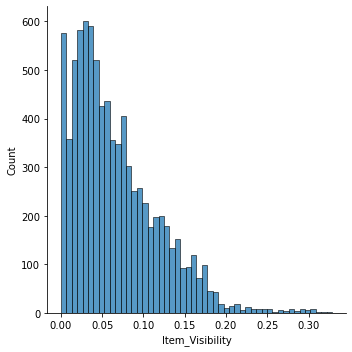

In [3]:
sns.displot(data['Item_Visibility'] )

In [4]:
bin = np.arange(0,0.3,0.05/8)
# data['Item_Visibility'] >= 0.05
bin_str = [str(e) for e in bin]

In [5]:
len(bin_str)

48

In [6]:
data['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [7]:
data['Outlet_Location_Type'].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [8]:
data['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [9]:
data['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
NCJ30     9
DRN47     9
FDD38     9
         ..
FDT35     1
FDK57     1
FDN52     1
FDE52     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [11]:
#data['Item_Identifier'] == 'FDG33' or data['item_visibility'] >= 0.06 

In [12]:
#data[data['Item_Identifier'] == 'FDG33' or data['item_visibility'] >=0.06]['Item_Type']

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [13]:
#data['Outlet_Establishment_Year'].value_counts().values

array([1463,  932,  930,  930,  930,  929,  928,  926,  555], dtype=int64)

In [ ]:
data['Item_Outlet_Sales'].value_counts()

In [ ]:
l = []
for e in data['Item_Outlet_Sales'].value_counts().index:
    l.append(list(set(data[data['Item_Outlet_Sales'] == e]['Item_Type'].values)))

In [ ]:
data = l

In [ ]:
columns = set([]) # empty set since set skip the same entries
for l in data: # a list in data
    for e in l: # a element in list
        columns.add(e)
columns = list(columns) # convert set to list to easy iterate
columns = sorted(columns) # sort elements by alphabetical order
columns

In [ ]:
bool_data = []
for l in data: # a list in data
    temp = []
    for c in columns: # every column in columns
        if c in l: # if column is in the list
            temp.append(True) # append the value True 
        else:
            temp.append(False) # append the value False
    bool_data.append(temp) 

In [ ]:
bool_data

In [ ]:
data = pd.DataFrame(bool_data, columns = columns) # creating data frame

In [ ]:
data

In [ ]:
apr = apriori(df = data, min_support = 0.1, use_colnames = True)
apr